In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
sneaker_data = pd.read_excel('2019_Winter_Data_Set.xlsx')

In [31]:
sneaker_data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [14]:
sneaker_data.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
5,6,58,882,138,1,credit_card,2017-03-14 15:25:00.986
6,7,87,915,149,1,cash,2017-03-01 21:37:57.465
7,8,22,761,292,2,cash,2017-03-08 02:05:37.981
8,9,64,914,266,2,debit,2017-03-17 20:56:50.468
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26.343


In [9]:
sneaker_data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

^ No Missing values to take of

In [10]:
sneaker_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
sneaker_data.

The Table above reveals a few important points. 
- The data set contains information on 5,000 different transactions.
- shop_id: 100 different sellers are included in the data set.
- user_id: 999 - 607 different types of user_id.
- order_amount: Smallest purchase order is $90; The largest purchase order is $704000.
- total_items: Smallest order includes 1 pair of shoes; Largest order includes 2000 pairs of shoes;

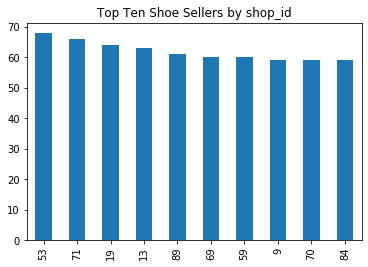

In [22]:
sneaker_data.shop_id.value_counts().head(10).plot(kind='bar',title='Top Ten Shoe Sellers by shop_id')

In [28]:
sneaker_data.groupby('shop_id').order_amount.sum().sort_values(ascending = False).head(10)

shop_id
42    11990176
78     2263800
89       23128
81       22656
6        22627
13       21760
59       21538
71       21320
19       20538
70       20241
Name: order_amount, dtype: int64

^^ Top Ten Shoe Sellers by Sales. Seller id 42 and 78 seem to be outliers; let's check their sales.

In [33]:
sneaker_data.loc[sneaker_data.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
834,835,42,792,352,1,cash,2017-03-25 21:31:24.596
835,836,42,819,704,2,cash,2017-03-09 14:15:15.136
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45.330
979,980,42,744,352,1,debit,2017-03-12 13:09:03.570


In [40]:
sneaker_data[sneaker_data.order_amount == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [38]:
sneaker_data.loc[sneaker_data.shop_id == 42].order_amount.sum()/sneaker_data.loc[sneaker_data.shop_id == 42].total_items.sum()

352.0

There seems to be suspicious activity going on in Seller shop_id 42. 
- All orders of $704000 are made by credit card.
- They are all made by user_id 607.
- All the transactions take place at 4 am.

In [34]:
sneaker_data.loc[sneaker_data.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843


In [37]:
sneaker_data.loc[sneaker_data.shop_id == 78].order_amount.sum()/sneaker_data.loc[sneaker_data.shop_id == 78].total_items.sum()

25725.0

Seller Shop_Id Number 78 Seems to be a major outlier because each shoe costs $25,725.00 and that's way beyond the price of a normal pair of shoes. (Domain Knowledge)

In [11]:
sneaker_data.payment_method.value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

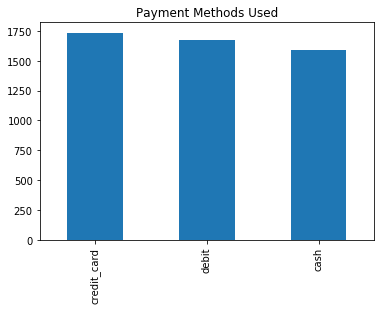

In [19]:
sneaker_data.payment_method.value_counts().plot(kind='bar', title = 'Payment Methods Used')